### 10. Pseudo random number generator II
10. Pseudo random number generator II
Generate a time series of $10^5$ random numbers with an LCG with larger
period (e.g., *drand48*) and compute $X$ and $\sigma^2_X$
for $N = 10^3$ , $10^4$ , and
$10^5$ random numbers. Compare the values with the exact analytical
results. Repeat problems 8d) and 8e) with this LCG.
$$
X_{i+1} = (aX_i + c) \mod m,
$$

$a = 25214903917$, $c = 11$, $m = 2^{48}$,
$X_0 = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

```cpp
#include <fstream>
#include <math.h>

long long prev_number = 1LL;
long a = 25214903917;
int c = 11;
long long m = 1LL << 48;

long double LCG(){
    prev_number = fabs((a*prev_number+c) % m);
    return (double) (prev_number) / m;
}
int main(int argc, char* argv[]){
    std::ofstream out("out/lcg.txt");
    for(int i = 0; i < 1e5; ++i){
        out << LCG() << " ";
    }
    out << std::flush;
}
```

In [3]:
!./task10

In [4]:
#load random numbers
X = np.loadtxt("out/lcg.txt")

In [5]:
means = []
variances = []
for N in [10**3,10**4,10**5]:
    means.append(np.mean(X[:N]))
    variances.append(np.std(X[:N])**2)

print(f"N =\t\t10^3\t\t10^4\t\t10^5\t\texpected")
print(f"mean\t\t"   + "\t".join(f"{mean:.8f}" for mean in means)   +"\t0.5")
print(f"variance\t" + "\t".join(f"{var:.8f}" for var in variances) + "\t0.08333333")

N =		10^3		10^4		10^5		expected
mean		0.50524316	0.49478495	0.49921138	0.5
variance	0.08504673	0.08429965	0.08365572	0.08333333


**d)** Plot the so-called running average $\overline{X}(n) = \sum^n_{i=1} X_i\,/\,n$ as function
of $n$ in the interval $n \in [30\,000, 40\,000]$.

In [6]:
n = np.arange(3*1e4,4*1e4,dtype=int)
running_avg = np.array([np.mean(X[:n_val]) for n_val in n])


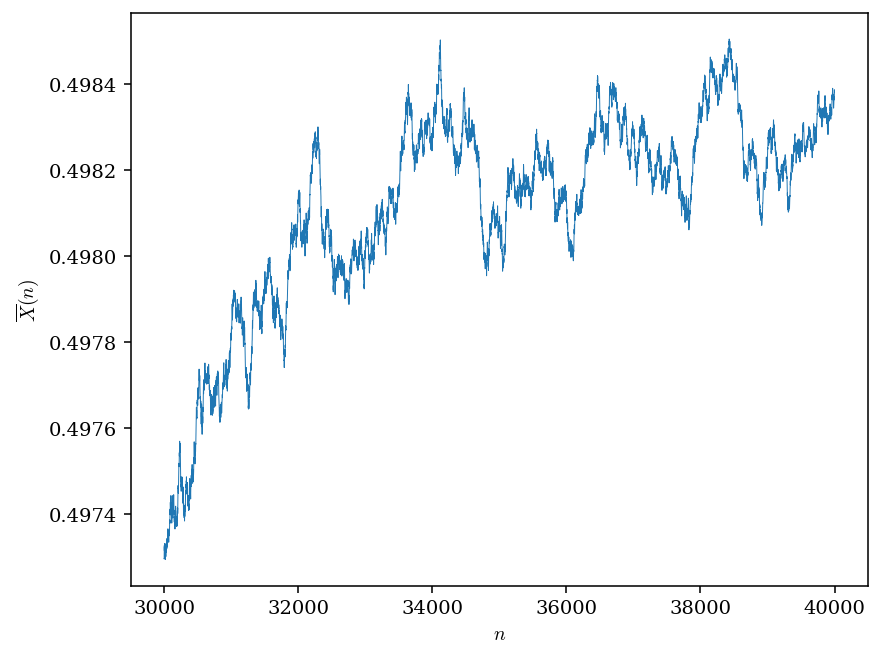

In [7]:
plt.plot(n,running_avg, lw=0.5)
plt.ylabel(r"$\overline{X}(n)$")
plt.xlabel(r"$n$")

plt.show()

**e)** Plot an $xy$ graph with $x = X_i$ and $y = X_{i+1}$ for $i = 1, 3, 5, ...$

In [8]:
x = X[:10**4:2]
y = X[1:10**4+1:2]

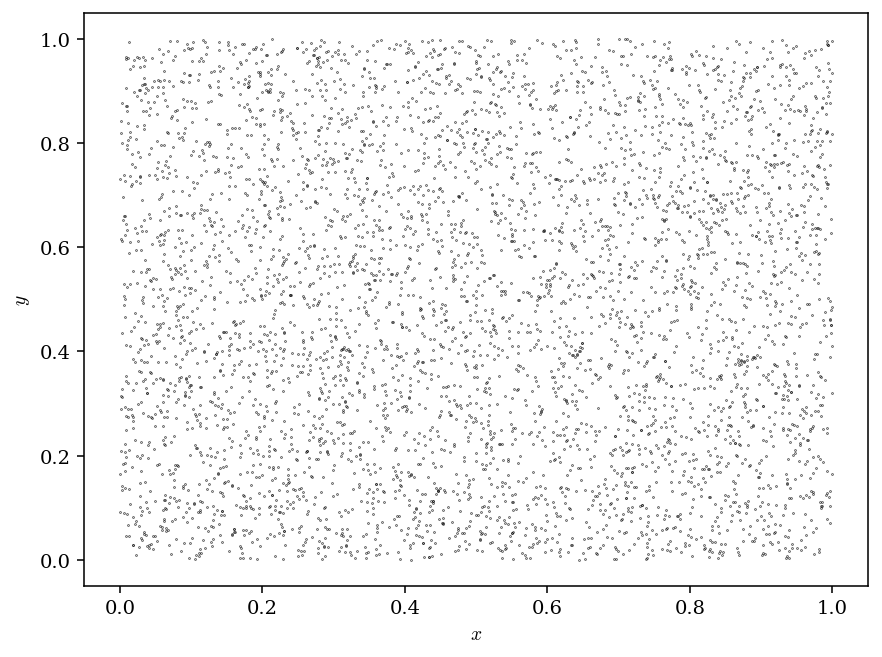

In [9]:
plt.plot(x,y,"k.",ms=0.5)
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")

plt.show()